# # Diabetics_Readmission

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# import function to perform feature selection
from sklearn.feature_selection import RFE

In [3]:
# seting the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
#importing the diabetics dataset

df=pd.read_csv(r"C:\Users\SHIVANI SAKILASEKAR\Desktop\GL\CAPSTONE projectttt\dataset_diabetes\diabetic_data.csv")

df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [5]:
df1=df.copy()
df1.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30


# Data Preparation

In [20]:
# using 'shape' to check the dimension of data

df1.shape

(101766, 50)

Interpretation- The data has 1,01,766 observations and 50 variables

In [21]:
df1['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [22]:
# using 'info()' to understand the dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [23]:
df1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [24]:
#finding out the numerical columns

df_num=df1.select_dtypes(include=np.number)
df_num.head(2)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9


In [25]:
df_num.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [26]:
df_cat=df.select_dtypes(include=np.object)
df_cat.head(2)

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [27]:
df_cat.columns

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# Null Value detection and treatment

In [28]:
df1.replace("?",np.nan,inplace=True)

In [29]:
df1.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Percentage of null values to be determined by

In [30]:
df1_null=(df1.isnull().sum()/len(df1))*100
df1_null

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [31]:
df1_null=df1_null.sort_values(ascending=False)
df1_null[df1_null>0]

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

 The columns like weight,medical_specialty,payer_code,race,diag_3,diag_2,diag_1 are carrying null values and it has to be treated by the coressponding methods.

# Univariate analysis of contionus variable

In [32]:

#For 'Medical Speciality' column

df1['medical_specialty'].value_counts()


InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
Surgery-General                   3099
                                 ...  
Speech                               1
Neurophysiology                      1
Proctology                           1
Pediatrics-InfectiousDiseases        1
Perinatology                         1
Name: medical_specialty, Length: 72, dtype: int64

<AxesSubplot:>

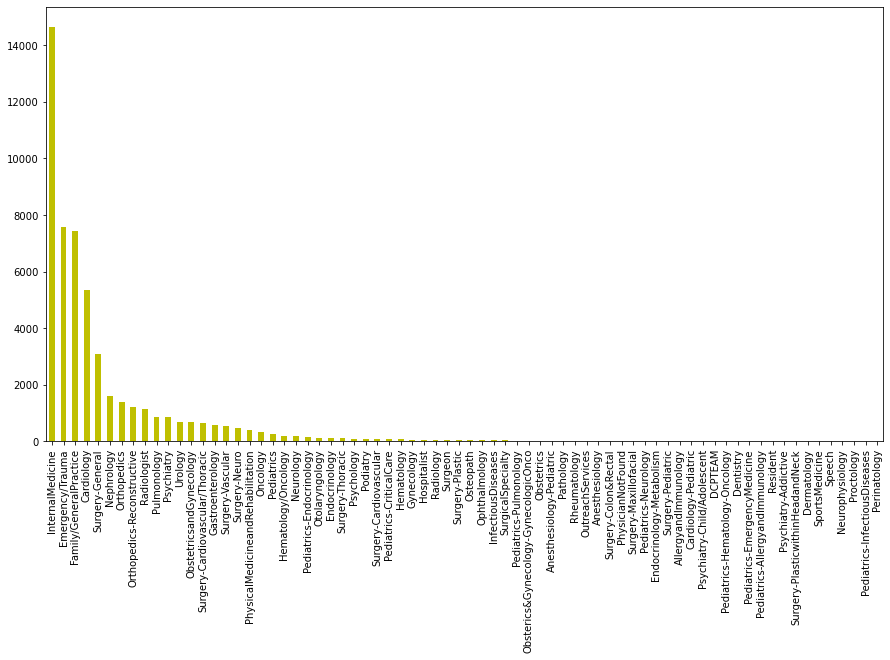

In [33]:
#plotiing a bar graph for the obseravtions in 'Medical Speciality' column

plt.figure(figsize=(15,8))
df1['medical_specialty'].value_counts().plot(kind='bar',color='y')

In [34]:
#'InternalMedicine' has the most value counts.

In [35]:
# for 'Player code' variable

df1['payer_code'].value_counts()


MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

<AxesSubplot:>

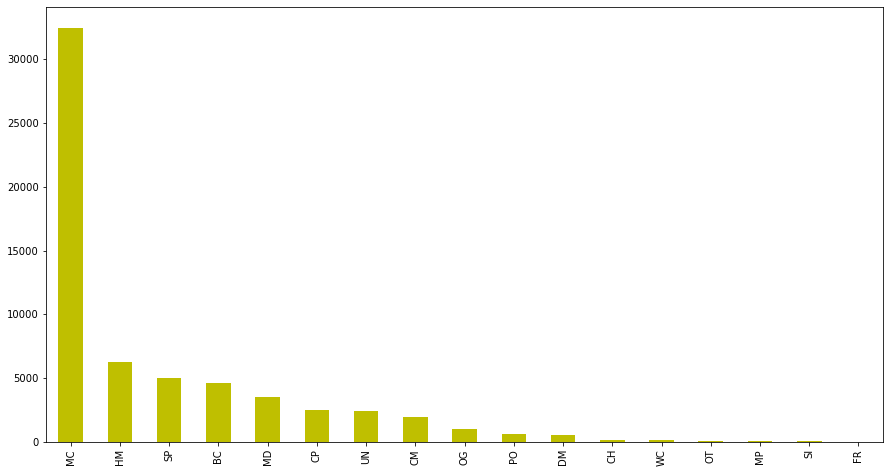

In [36]:
##plotiing a bar graph for the obseravtions in 'Medical Speciality' column


df1['payer_code'].value_counts().plot(kind='bar',color='y')

In [37]:
# the 'MC' has the hightest and 'FR' ha only one obbservation

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


<AxesSubplot:>

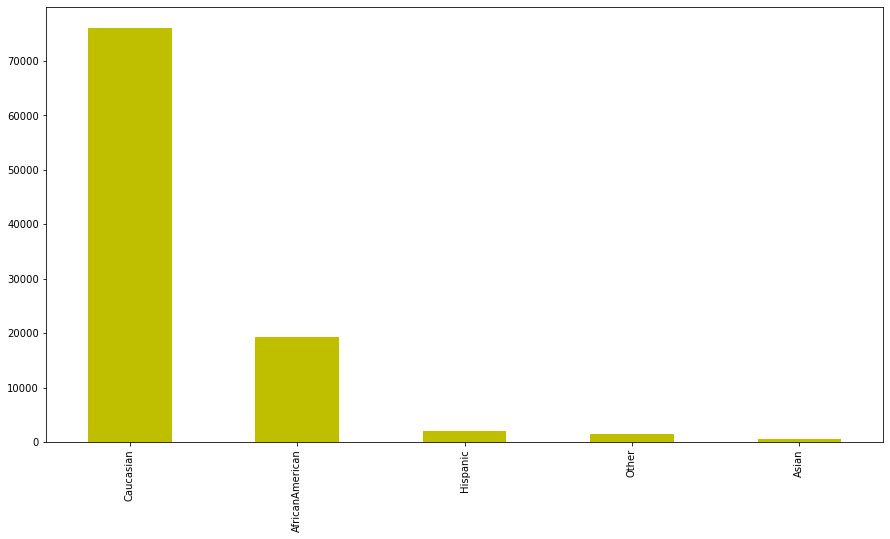

In [38]:
print(df1['race'].value_counts())

df1['race'].value_counts().plot(kind='bar',color='y')

            'Caucasian' has the highest observation .

# Univariate analysis for categorical variables

THE TARGET VARIABLE- Readmitted

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


Text(1.9, 11358, '11.16%')

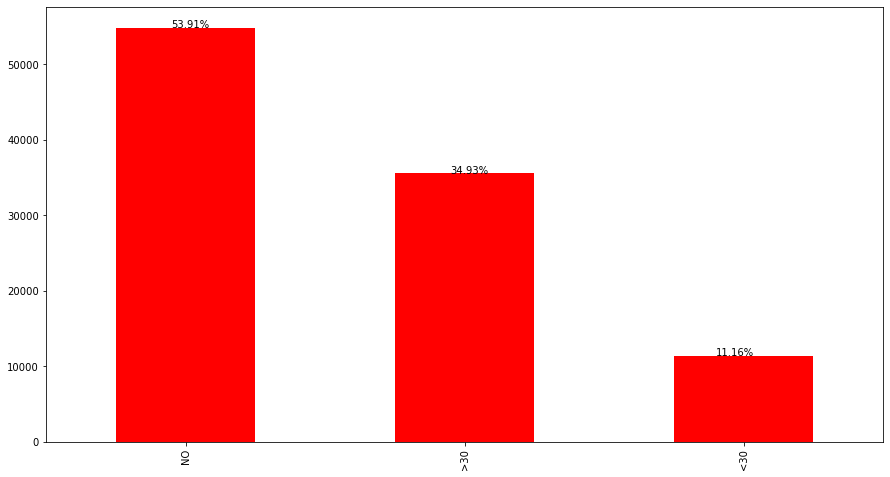

In [39]:
print(df1['readmitted'].value_counts()) #Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days,
         #“>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission
    
    
df1['readmitted'].value_counts().plot(kind='bar',color='r')
plt.text(x = -0.05, y = df1['readmitted'].value_counts()[0] + 1, s = str(round((df1['readmitted'].value_counts()[0])*100/len(df1['readmitted']),2)) + '%')
plt.text(x = 0.95, y = df1['readmitted'].value_counts()[1] +1, s = str(round((df1['readmitted'].value_counts()[1])*100/len(df1['readmitted']),2)) + '%')
plt.text(x = 1.9, y = df1['readmitted'].value_counts()[2] +1, s = str(round((df1['readmitted'].value_counts()[2])*100/len(df1['readmitted']),2)) + '%')


    Days to inpatient readmission. “No” for no record of readmission has the most counted obseravtion.

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


<AxesSubplot:>

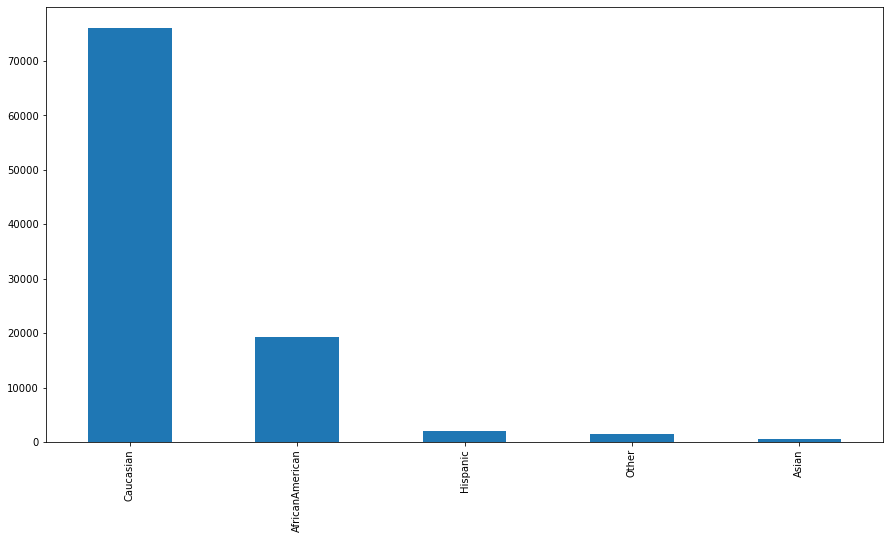

In [40]:
# for 'race' variable

print(df1['race'].value_counts())

df1['race'].value_counts().plot(kind='bar')

         'Caucasian' is more in race category than 'AfricanAmerican' and others

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


<AxesSubplot:>

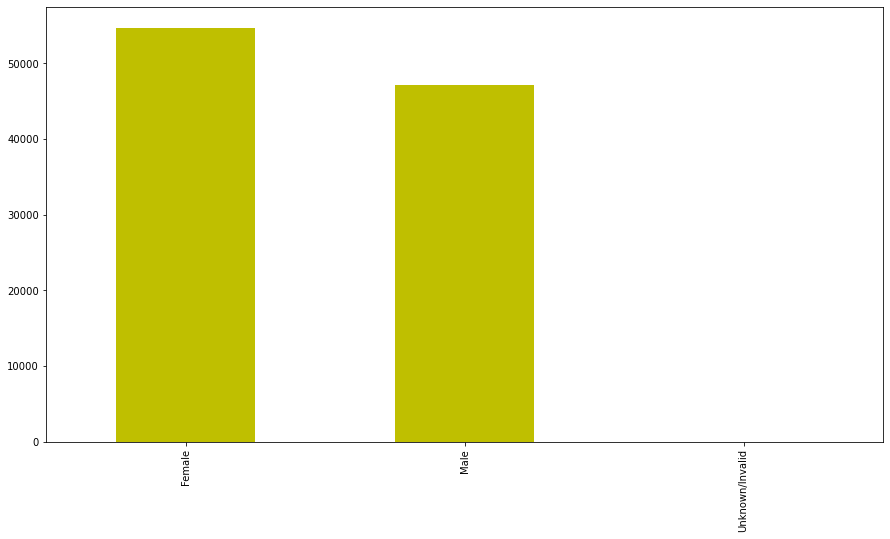

In [41]:
# for 'gender' variable

print(df1['gender'].value_counts())

df1['gender'].value_counts().plot(kind='bar',color='y')

 Female has high obseravtion than male and unknown/invalid is in negligible

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


<AxesSubplot:>

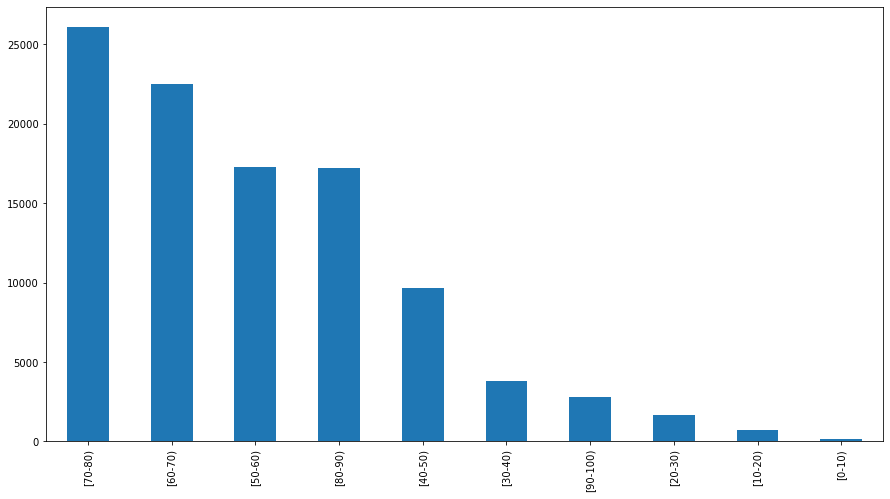

In [42]:
# for 'age' variable

print(df1['age'].value_counts())

df1['age'].value_counts().plot(kind='bar')

        70-80 age group has maximum and 0-10 are the minimum inpatients

In [43]:
df1['admission_type_id']=df1['admission_type_id'].astype('object')
#Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

<AxesSubplot:>

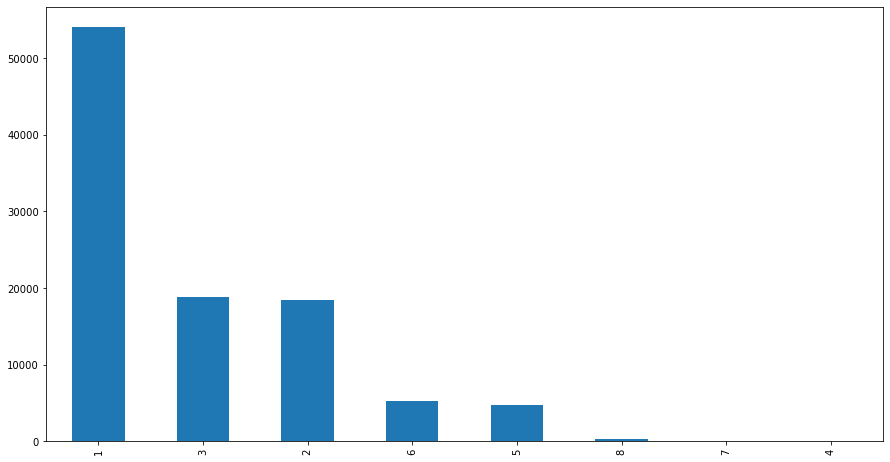

In [44]:
df1['admission_type_id'].value_counts()

plt.figure(figsize=(15,8))
df1['admission_type_id'].value_counts().plot(kind='bar')

In [45]:
df1['discharge_disposition_id']=df1['discharge_disposition_id'].astype('object')

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


<AxesSubplot:>

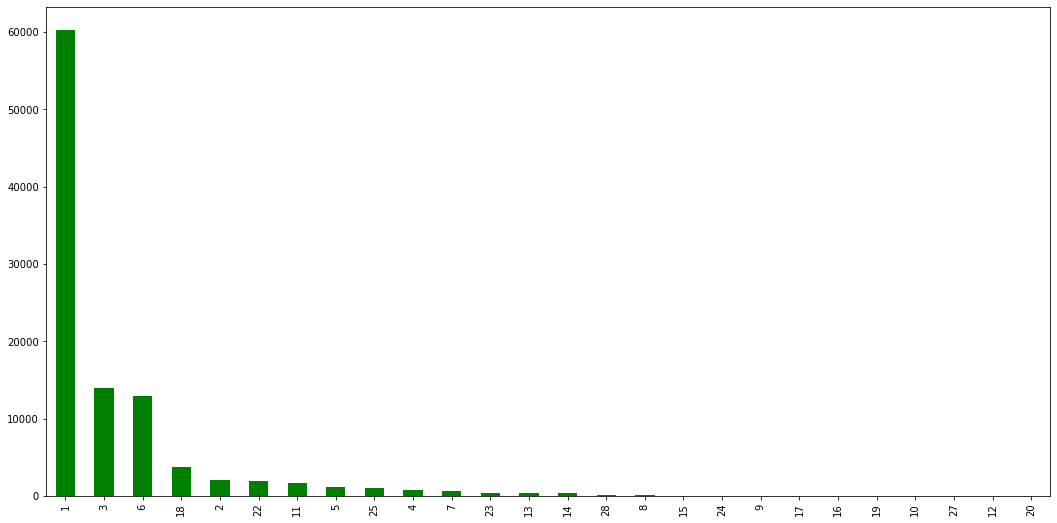

In [46]:

#
print(df1['discharge_disposition_id'].value_counts())

plt.figure(figsize=(18,9))
df1['discharge_disposition_id'].value_counts().plot(kind='bar',color='g')

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64


<AxesSubplot:>

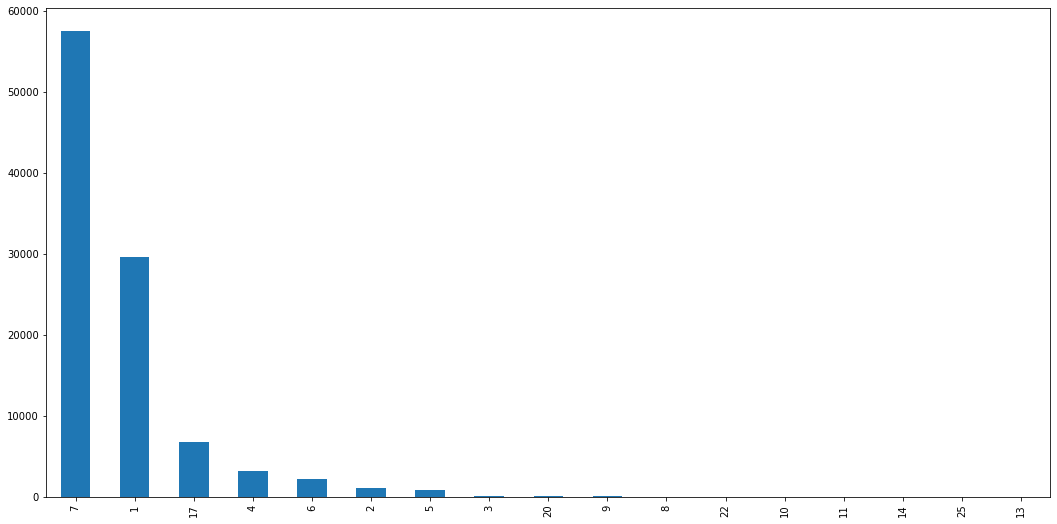

In [47]:


print(df1['admission_source_id'].value_counts())

plt.figure(figsize=(18,9))
df1['admission_source_id'].value_counts().plot(kind='bar')

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


<AxesSubplot:ylabel='Frequency'>

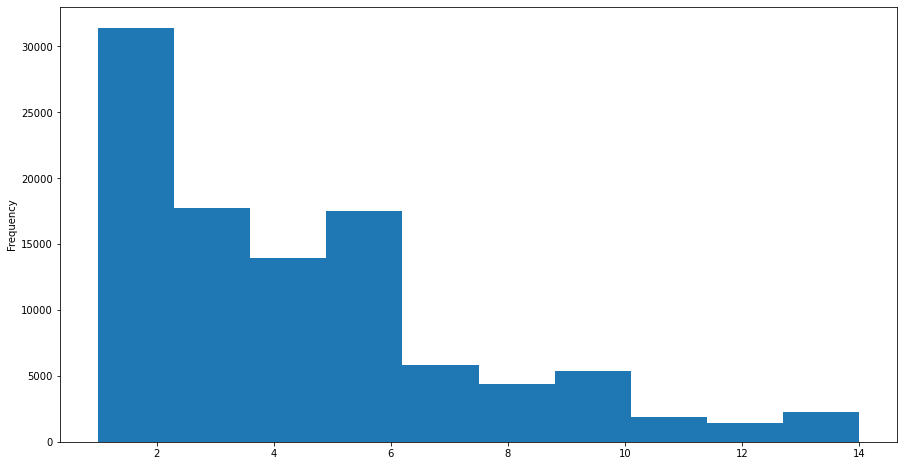

In [48]:
print(df1['time_in_hospital'].describe())

df1['time_in_hospital'].plot(kind='hist')

<AxesSubplot:>

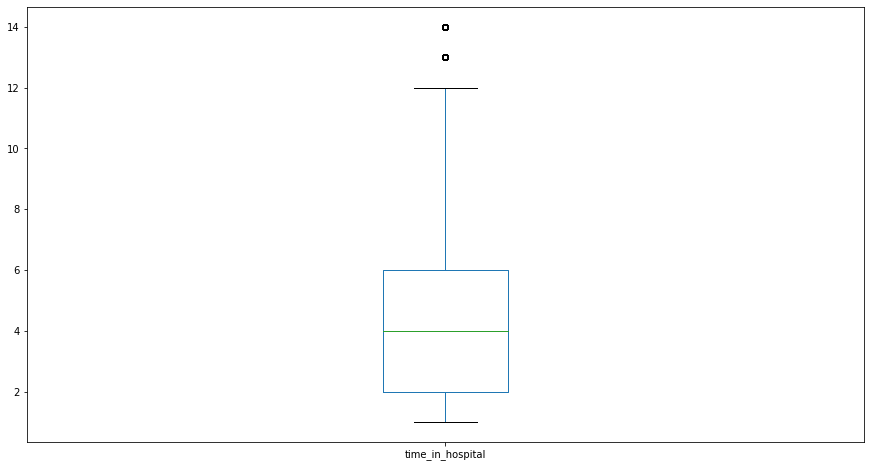

In [49]:


df1['time_in_hospital'].plot(kind='box')

In [50]:
print(df1['num_lab_procedures'].dtypes)


df1['num_lab_procedures'].describe() #Number of lab tests performed during the encounter

int64


count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64

<AxesSubplot:ylabel='Frequency'>

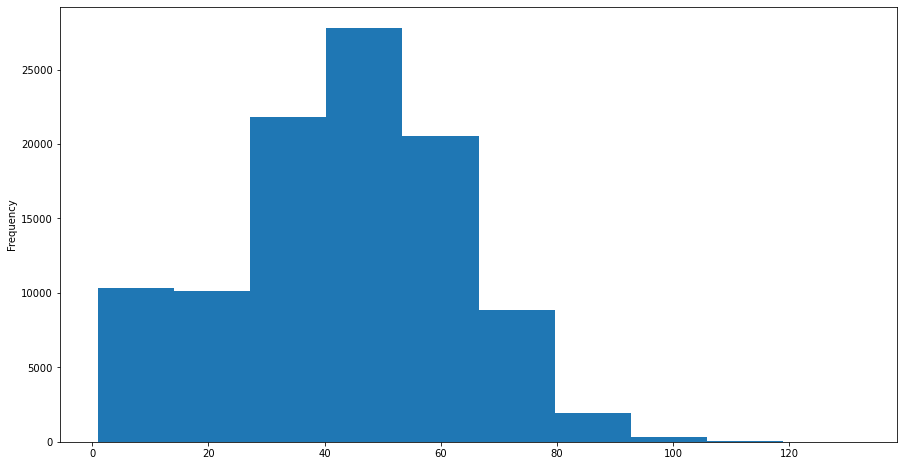

In [51]:
df1['num_lab_procedures'].plot(kind='hist')

int64


<AxesSubplot:ylabel='Frequency'>

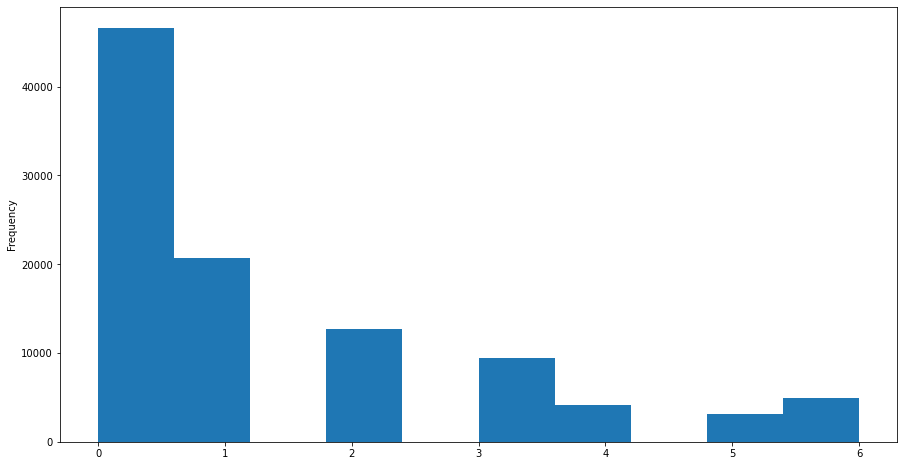

In [52]:
print(df1['num_procedures'].dtypes)

df1['num_procedures'].plot(kind='hist') 
#Number of procedures (other than lab tests) performed during the encounter

int64


<AxesSubplot:ylabel='Frequency'>

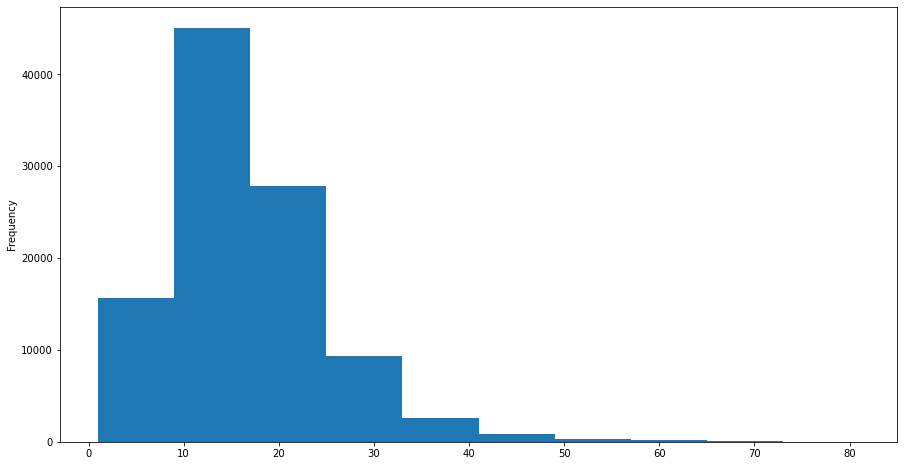

In [53]:
print(df1['num_medications'].dtypes)

df1['num_medications'].plot(kind='hist')

int64


<AxesSubplot:ylabel='Frequency'>

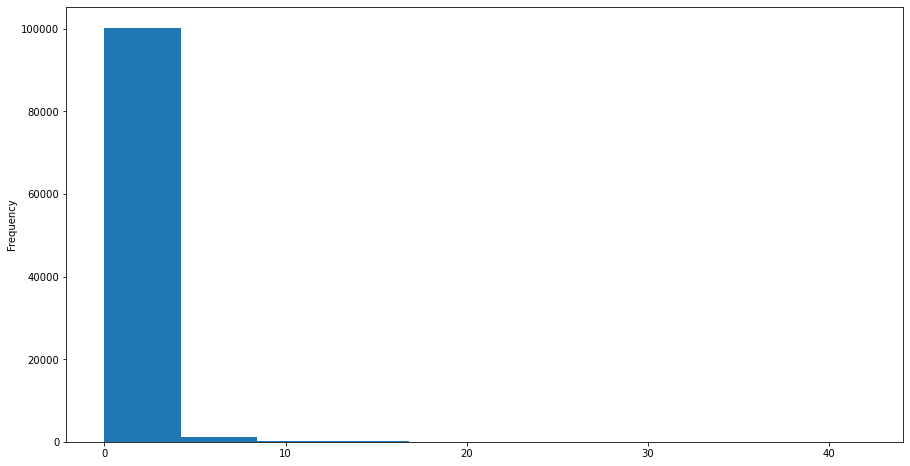

In [54]:
print(df1['number_outpatient'].dtypes)

df1['number_outpatient'].plot(kind='hist')

# Bi-variate analysis

In [55]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [56]:
df_num.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

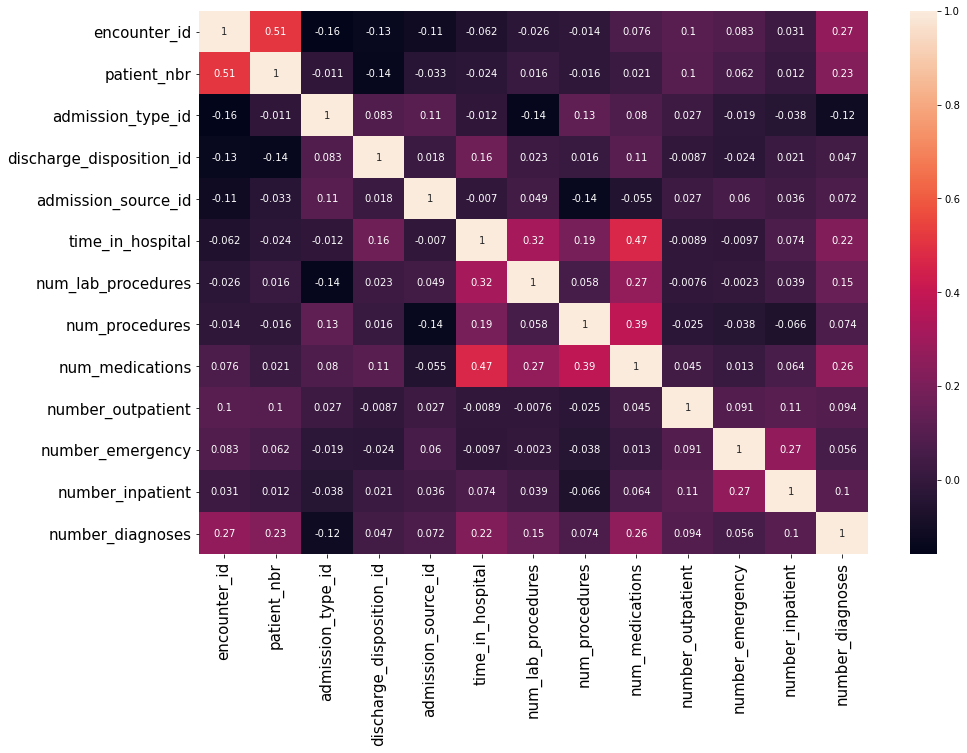

In [57]:
# set dimensions for the plot figure
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_features = df_num

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_features.corr(), annot = True, annot_kws = {"size": 10})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

Since there is no high co-relation between any variable. So,no action can be taken.

# Bivariate analysis with categorical variables

In [58]:
df_cat.columns

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [59]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()


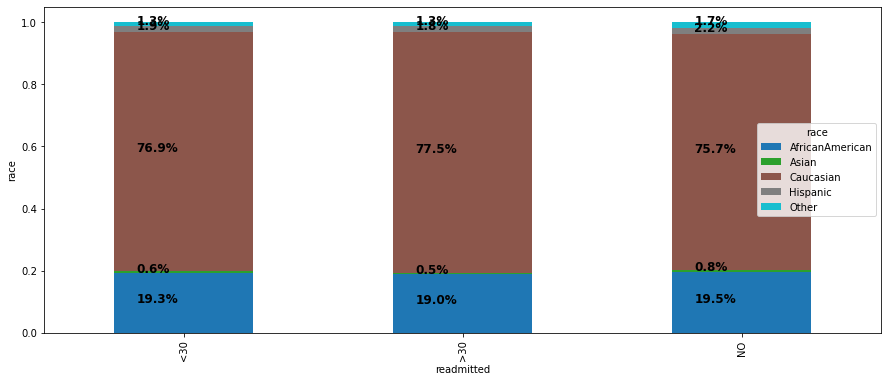

In [60]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['race'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['race'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('race')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

As the Race doesnot show any significant variations on the readmission obseravtions. There is no impact inferenced.

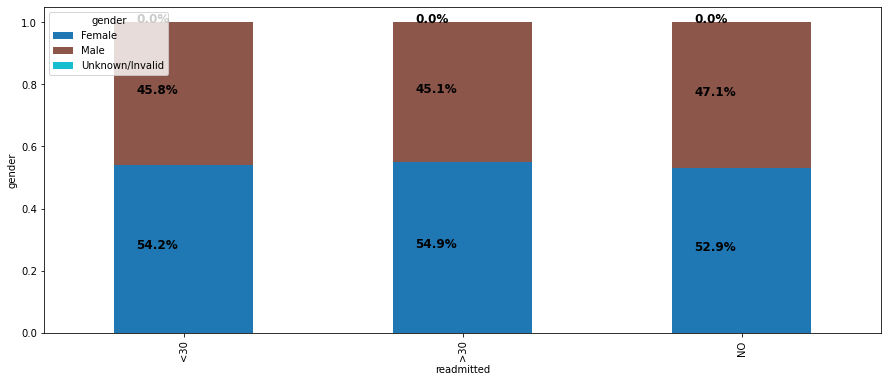

In [61]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['gender'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['gender'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('gender')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


As the distribution of Gender on the target variable is same so the Gender dont have any impact on target.

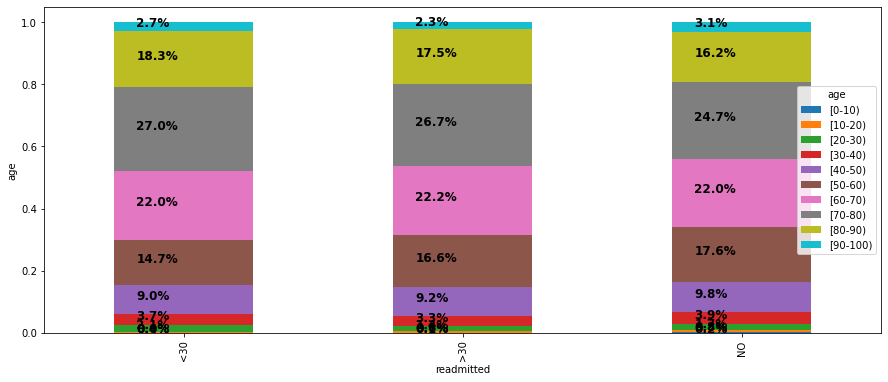

In [62]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['age'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['age'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('age')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

As the Age doesnot show any significant variation over the different target variations. It dont have any significance.

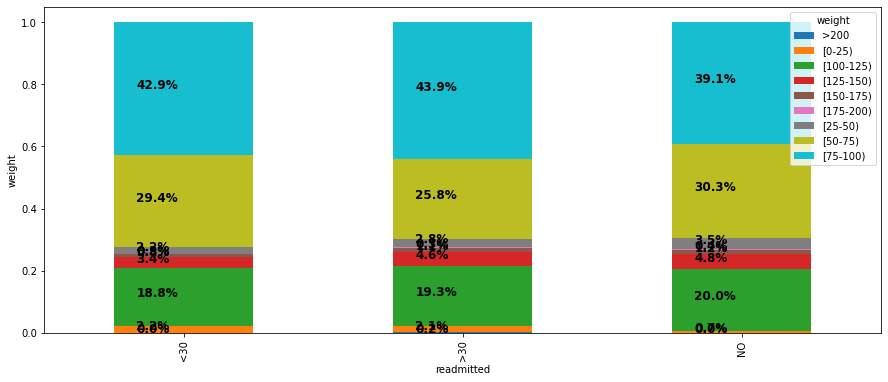

In [63]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['weight'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['weight'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('weight')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

As the weight doesnot show any significant variation over the different target variations. It dont have any significance.

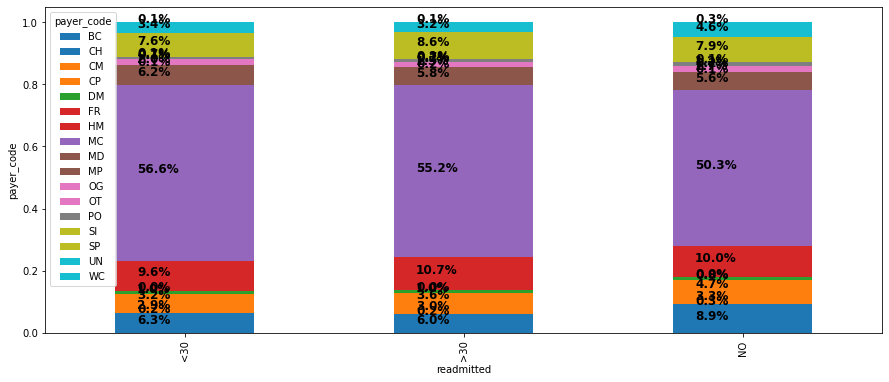

In [64]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['payer_code'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['payer_code'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('payer_code')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

As the Payer_code doesnot show any significant variation over the different target variations. It dont have any significance.

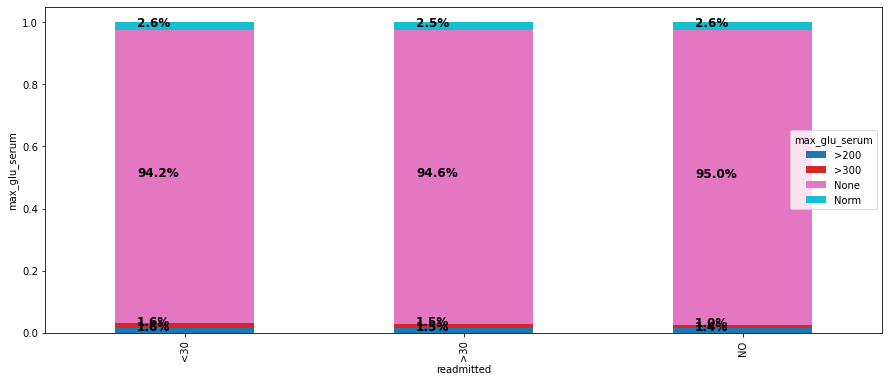

In [65]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['max_glu_serum'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['max_glu_serum'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('max_glu_serum')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

As the max_glu_serum doesnot show any significant variation over the different target variations. It dont have any significance.

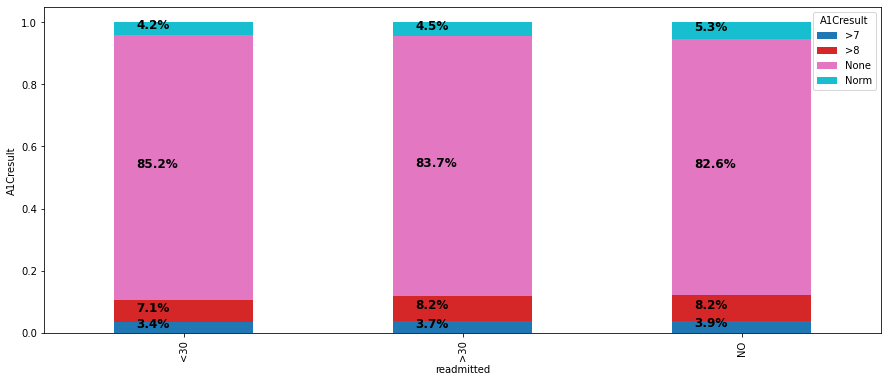

In [66]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['A1Cresult'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['A1Cresult'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('A1Cresult')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

As the A1Cresult doesnot show any significant variations on the readmission obseravtions. There is no impact inferenced.

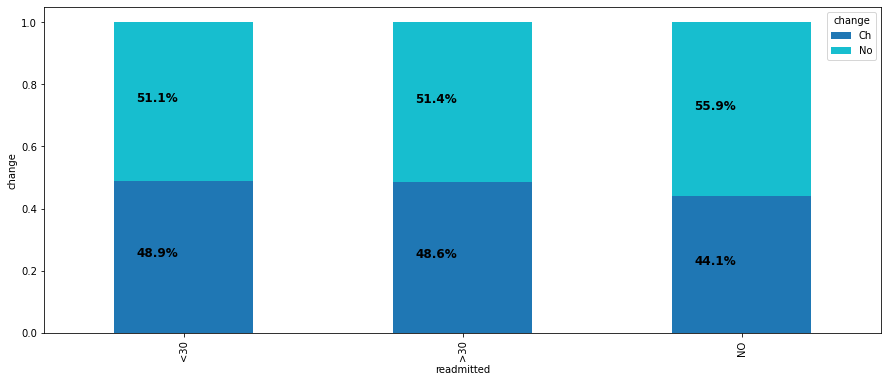

In [67]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['change'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['change'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('change')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

As the change doesnot show any significant variations on the readmission obseravtions. There is no impact inferenced.

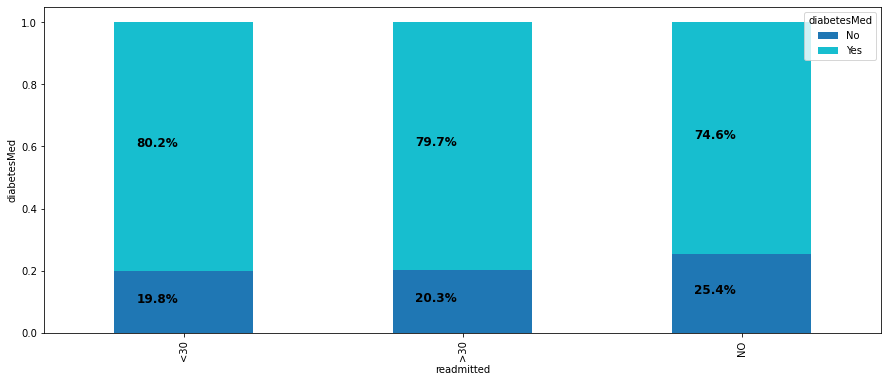

In [68]:
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['diabetesMed'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['diabetesMed'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

#plt.legend(loc="upper left", ncol=2)
plt.xlabel("readmitted")
plt.ylabel('diabetesMed')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

As the diabetesMed doesnot show any significant variations on the readmission obseravtions. There is no impact inferenced.

In [69]:
df1['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

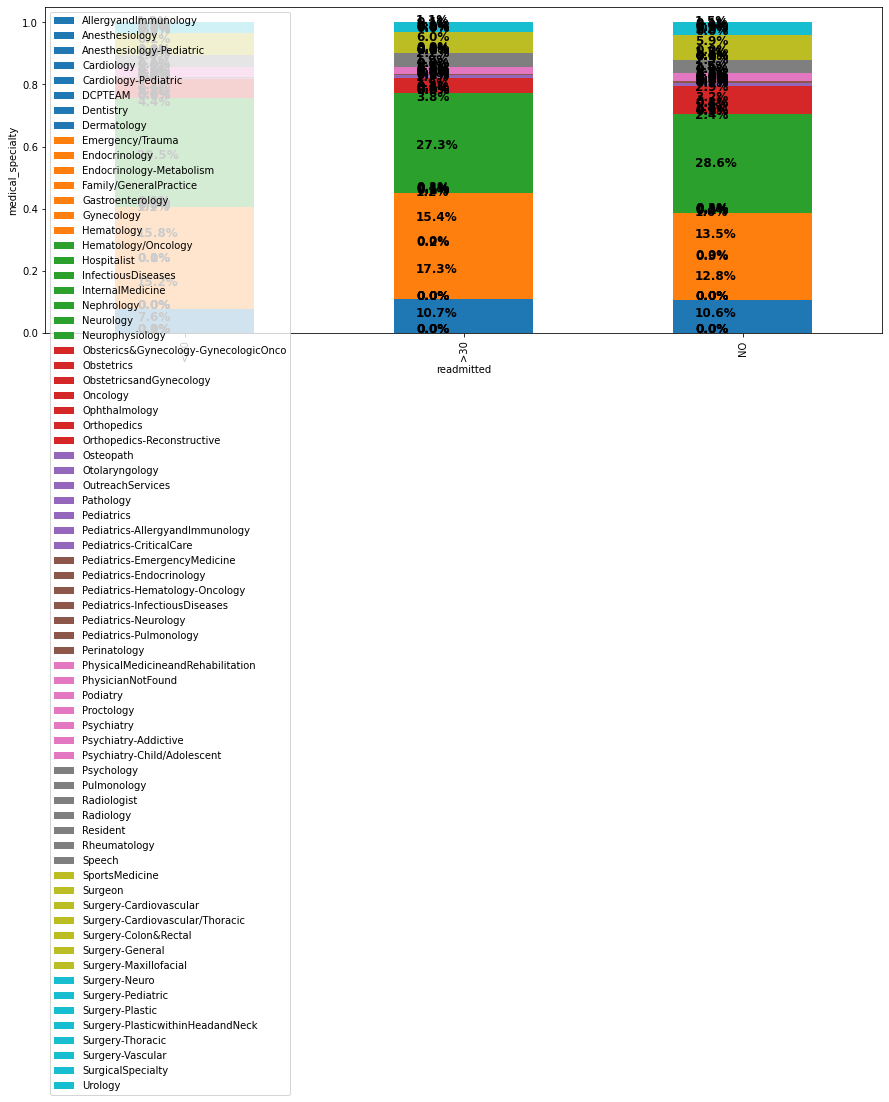

In [70]:
#pd.crosstab(df1['readmitted'],df1['medical_specialty']).plot(kind='bar')
cross_tab_prop = pd.crosstab(index=df1['readmitted'],
                             columns=df1['medical_specialty'],
                             normalize="index") #Using the normalize=True argument gives us the index-wise proportionofthedata.
cross_tab = pd.crosstab(index=df1['readmitted'],
                             columns=df1['medical_specialty'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 6))

plt.legend(loc="upper left")
plt.xlabel("readmitted")
plt.ylabel('medical_specialty')

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

# Feature Engineering for categorical variables

In [71]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [72]:
df2=df1.get(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'])
df2.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No


In [73]:
df3 = pd.get_dummies(data=df2)

In [74]:
df4=pd.DataFrame()


df4['up']=df3['metformin_Up']+df3['repaglinide_Up']+df3['nateglinide_Up']+df3['chlorpropamide_Up']+df3['glimepiride_Up']+df3['glipizide_Up']+df3['glyburide_Up']+df3['pioglitazone_Up']+df3['rosiglitazone_Up']+df3['acarbose_Up']+df3['miglitol_Up']+df3['tolazamide_Up']+df3['glyburide-metformin_Up']

df4['steady']=df3['metformin_Steady']+df3['repaglinide_Steady']+df3['nateglinide_Steady']+df3['chlorpropamide_Steady']+df3['glimepiride_Steady']+df3['acetohexamide_Steady']+df3['glipizide_Steady']+df3['glyburide_Steady']+df3['tolbutamide_Steady']+df3['pioglitazone_Steady']+df3['rosiglitazone_Steady']+df3['acarbose_Steady']+df3['miglitol_Steady']+df3['troglitazone_Steady']+df3['tolazamide_Steady']+df3['glyburide-metformin_Steady']+df3['glipizide-metformin_Steady']+df3['glimepiride-pioglitazone_Steady']+df3['metformin-rosiglitazone_Steady']+df3['metformin-pioglitazone_Steady']


df4['no'] = df3['metformin_No']+df3['repaglinide_No']+df3['nateglinide_No']+df3['chlorpropamide_No']+df3['glimepiride_No']+df3['acetohexamide_No']+df3['glipizide_No']+df3['glyburide_No']+df3['tolbutamide_No']+df3['pioglitazone_No']+df3['rosiglitazone_No']+df3['acarbose_No']+df3['miglitol_No']+df3['troglitazone_No']+df3['tolazamide_No']+df3['examide_No']+df3['citoglipton_No']+df3['glyburide-metformin_No']+df3['glipizide-metformin_No']+df3['glimepiride-pioglitazone_No']+df3['metformin-rosiglitazone_No']+df3['metformin-pioglitazone_No']

df4['down']=df3['metformin_Down']+df3['repaglinide_Down']+df3['nateglinide_Down']+df3['chlorpropamide_Down']+df3['glimepiride_Down']+df3['glipizide_Down']+df3['glyburide_Down']+df3['pioglitazone_Down']+df3['rosiglitazone_Down']+df3['acarbose_Down']+df3['miglitol_Down']+df3[ 'glyburide-metformin_Down']

In [75]:
df4.head()

,up,steady,no,down
0,0,0,22,0
1,0,0,22,0
2,0,1,21,0
3,0,0,22,0
4,0,1,21,0


In [76]:
df1=df1.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)



In [77]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,250.83,NaN,NaN,1,None,None,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,276,250.01,255,9,None,None,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,648,250,V27,6,None,None,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,8,250.43,403,7,None,None,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,197,157,250,5,None,None,Steady,Ch,Yes,NO


In [78]:
df1 = pd.concat([df1, df4], axis=1)

In [79]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,up,steady,no,down
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,None,None,No,No,No,NO,0,0,22,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,None,None,Up,Ch,Yes,>30,0,0,22,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,None,None,No,No,Yes,NO,0,1,21,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,None,None,Up,Ch,Yes,NO,0,0,22,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,None,None,Steady,Ch,Yes,NO,0,1,21,0


In [80]:
df2=df.get(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'])
df2.head()  ####those 24 columns are to be stored in the dataframe 24 after filtered out from df1.

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No


In [81]:
df3 = pd.get_dummies(data=df2)  #df3= the encoded 24 columns of medications

In [82]:
df4 = pd.DataFrame()
df4['med_down']=df3['metformin_Down']+df3['repaglinide_Down']+df3['nateglinide_Down']+df3['chlorpropamide_Down']+df3['glimepiride_Down']+df3['glipizide_Down']+df3['glyburide_Down']+df3['pioglitazone_Down']+df3['rosiglitazone_Down']+df3['acarbose_Down']+df3['miglitol_Down']+df3[ 'glyburide-metformin_Down']
df4['med_up']=df3['metformin_Up']+df3['repaglinide_Up']+df3['nateglinide_Up']+df3['chlorpropamide_Up']+df3['glimepiride_Up']+df3['glipizide_Up']+df3['glyburide_Up']+df3['pioglitazone_Up']+df3['rosiglitazone_Up']+df3['acarbose_Up']+df3['miglitol_Up']+df3['tolazamide_Up']+df3['glyburide-metformin_Up']

df4['med_steady']=df3['metformin_Steady']+df3['repaglinide_Steady']+df3['nateglinide_Steady']+df3['chlorpropamide_Steady']+df3['glimepiride_Steady']+df3['acetohexamide_Steady']+df3['glipizide_Steady']+df3['glyburide_Steady']+df3['tolbutamide_Steady']+df3['pioglitazone_Steady']+df3['rosiglitazone_Steady']+df3['acarbose_Steady']+df3['miglitol_Steady']+df3['troglitazone_Steady']+df3['tolazamide_Steady']+df3['glyburide-metformin_Steady']+df3['glipizide-metformin_Steady']+df3['glimepiride-pioglitazone_Steady']+df3['metformin-rosiglitazone_Steady']+df3['metformin-pioglitazone_Steady']
            
df4['med_no'] = df3['metformin_No']+df3['repaglinide_No']+df3['nateglinide_No']+df3['chlorpropamide_No']+df3['glimepiride_No']+df3['acetohexamide_No']+df3['glipizide_No']+df3['glyburide_No']+df3['tolbutamide_No']+df3['pioglitazone_No']+df3['rosiglitazone_No']+df3['acarbose_No']+df3['miglitol_No']+df3['troglitazone_No']+df3['tolazamide_No']+df3['examide_No']+df3['citoglipton_No']+df3['glyburide-metformin_No']+df3['glipizide-metformin_No']+df3['glimepiride-pioglitazone_No']+df3['metformin-rosiglitazone_No']+df3['metformin-pioglitazone_No']

In [83]:
df4.head()

,med_down,med_up,med_steady,med_no
0,0,0,0,22
1,0,0,0,22
2,0,0,1,21
3,0,0,0,22
4,0,0,1,21


In [84]:
df1_rest = df.get(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult','insulin'])

In [85]:
df1_modified = pd.concat([df1_rest,df4], axis=1)

In [86]:
df1_modified.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,med_down,med_up,med_steady,med_no
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,?,?,1,None,None,No,0,0,0,22
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,250.01,255,9,None,None,Up,0,0,0,22
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,250,V27,6,None,None,No,0,0,1,21
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,250.43,403,7,None,None,Up,0,0,0,22
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,157,250,5,None,None,Steady,0,0,1,21


In [87]:
num_col =['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

In [88]:
cat_col = ['age','race', 'gender','admission_type_id', 
        'discharge_disposition_id', 'admission_source_id',
        'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult',
       'insulin', 'med_down', 'med_up', 'med_steady', 'med_no']

In [89]:
df_dumm = pd.get_dummies(df1_modified[cat_col], drop_first=True)

In [90]:
cat_col1 = pd.DataFrame(df_dumm.columns)[0]

# Basic Model Building

In [91]:
y = df1.readmitted
x = pd.concat([df1_modified[num_col],df_dumm], axis=1)

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify = y)

scaling the train and test

In [93]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train_ss = pd.DataFrame(ss.fit_transform(x_train[num_col]),columns=num_col,index=x_train.index)
x_train = pd.concat([x_train_ss,x_train[cat_col1]],axis=1)
x_train.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,admission_type_id,discharge_disposition_id,...,medical_specialty_Urology,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_No,insulin_Steady,insulin_Up
15479,-0.803767,0.502453,-0.786245,-1.233986,-0.288215,-0.208748,-0.502659,-1.768787,1,1,...,0,0,1,0,0,1,0,0,1,0
71326,3.213297,-1.377968,-0.786245,-0.618822,-0.288215,-0.208748,0.283601,0.815693,3,1,...,0,0,1,0,0,1,0,0,0,0
98566,-0.803767,-0.615635,0.972410,-0.495790,-0.288215,-0.208748,-0.502659,0.815693,2,1,...,0,0,1,0,0,1,0,1,0,0
32511,-0.134257,-0.005769,0.972410,0.611505,-0.288215,-0.208748,-0.502659,0.815693,1,1,...,0,0,1,0,0,1,0,1,0,0
48611,0.870010,0.705742,1.558629,0.980603,-0.288215,-0.208748,-0.502659,0.815693,5,6,...,0,0,1,0,0,1,0,0,0,1


In [94]:
x_test_ss = pd.DataFrame(ss.transform(x_test[num_col]),columns=num_col,index=x_test.index)
x_test = pd.concat([x_test_ss,x_test[cat_col1]], axis=1)
x_test.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,admission_type_id,discharge_disposition_id,...,medical_specialty_Urology,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_No,insulin_Steady,insulin_Up
62970,-0.134257,0.400809,-0.786245,-0.249724,0.489438,-0.208748,1.856120,0.815693,1,1,...,0,0,1,0,0,1,0,0,1,0
8337,0.535254,-0.412346,1.558629,-0.126691,-0.288215,-0.208748,-0.502659,0.815693,3,3,...,0,0,1,0,1,0,0,0,1,0
10577,0.200499,-0.005769,-0.786245,-1.603084,-0.288215,-0.208748,-0.502659,-0.218099,1,18,...,0,0,1,0,1,0,0,1,0,0
88493,-0.803767,1.163141,-0.786245,0.119374,-0.288215,-0.208748,-0.502659,0.815693,1,3,...,0,0,1,0,0,1,0,0,0,0
77615,-0.803767,-0.463168,0.386192,-0.249724,-0.288215,0.846620,0.283601,-1.768787,3,1,...,0,0,1,0,0,0,1,0,1,0


# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression()

In [96]:
y_train_pred = logreg.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         <30       0.44      0.02      0.03      9085
         >30       0.50      0.26      0.34     28436
          NO       0.59      0.89      0.71     43891

    accuracy                           0.57     81412
   macro avg       0.51      0.39      0.36     81412
weighted avg       0.54      0.57      0.50     81412



In [97]:
y_test_pred = logreg.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))



              precision    recall  f1-score   support

         <30       0.38      0.01      0.02      2272
         >30       0.50      0.26      0.34      7109
          NO       0.59      0.90      0.71     10973

    accuracy                           0.57     20354
   macro avg       0.49      0.39      0.36     20354
weighted avg       0.53      0.57      0.50     20354



In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [99]:
model_perfmnce = pd.DataFrame(columns = ['Model','Threshold','Accuracy_train','Accuracy_test','Precision_train','Precision_test','Recall_train',
                                     'Recall_test','F1_train','F1_test','ROC_AUC'])

def performance(model_name,model,x_train,x_test):
    
    y_train_pred_prob = model.predict_proba(x_train)[:,1]
    y_test_pred_prob = model.predict_proba(x_test)[:,1]
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    fpr,tpr,threshold = roc_curve(y_train,y_train_pred_prob)
    roc = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':threshold})
    roc['TPR-FPR'] = roc['TPR']-roc['FPR']
    t = roc[roc['TPR-FPR']==max(roc['TPR-FPR'])]['Threshold'].iloc[0]
    t = round(t,3)
    
    y_train_pred_OT = [0 if x<t else 1 for x in y_train_pred_prob]
    y_test_pred_OT = [0 if x<t else 1 for x in y_test_pred_prob]   
    
    acc_train = accuracy_score(y_train,y_train_pred)
    acc_test = accuracy_score(y_test,y_test_pred)
    pre_train = precision_score(y_train,y_train_pred)
    pre_test = precision_score(y_test,y_test_pred)
    rec_train = recall_score(y_train,y_train_pred)
    rec_test = recall_score(y_test,y_test_pred)
    f1_train = f1_score(y_train,y_train_pred)
    f1_test = f1_score(y_test,y_test_pred)
    ROC_AUC = roc_auc_score(y_test,y_test_pred)
    
    l = [model_name,'-',acc_train,acc_test,pre_train,pre_test,rec_train,rec_test,f1_train,f1_test,ROC_AUC]
    
    model_perfmnce.loc[len(model_perfmnce)] = l
    
#Optimum Threshold
    
    acc_train = accuracy_score(y_train,y_train_pred_OT)
    acc_test = accuracy_score(y_test,y_test_pred_OT)
    pre_train = precision_score(y_train,y_train_pred_OT)
    pre_test = precision_score(y_test,y_test_pred_OT)
    rec_train = recall_score(y_train,y_train_pred_OT)
    rec_test = recall_score(y_test,y_test_pred_OT)
    f1_train = f1_score(y_train,y_train_pred_OT)
    f1_test = f1_score(y_test,y_test_pred_OT)
    ROC_AUC = roc_auc_score(y_test,y_test_pred_OT)
    
    model_name = model_name + "_OT"
    l = [model_name,t,acc_train,acc_test,pre_train,pre_test,rec_train,rec_test,f1_train,f1_test,ROC_AUC ]
    
    model_perfmnce.loc[len(model_perfmnce)] = l
    return [y_test_pred,y_test_pred_OT]

In [100]:
model_perfmnce = pd.DataFrame(columns = ['Model','Threshold','Accuracy_train','Accuracy_test','Precision_train','Precision_test','Recall_train',
                                     'Recall_test','F1_train','F1_test','ROC_AUC'])

def performance(model_name,model,x_train,x_test):
    
    y_train_pred_prob = model.predict_proba(x_train)[:,1]
    y_test_pred_prob = model.predict_proba(x_test)[:,1]
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    fpr,tpr,threshold = roc_curve(y_train,y_train_pred_prob)
    roc = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':threshold})
    roc['TPR-FPR'] = roc['TPR']-roc['FPR']
    t = roc[roc['TPR-FPR']==max(roc['TPR-FPR'])]['Threshold'].iloc[0]
    t = round(t,3)
    
    y_train_pred_OT = [0 if x<t else 1 for x in y_train_pred_prob]
    y_test_pred_OT = [0 if x<t else 1 for x in y_test_pred_prob]   
    
    acc_train = accuracy_score(y_train,y_train_pred)
    acc_test = accuracy_score(y_test,y_test_pred)
    pre_train = precision_score(y_train,y_train_pred)
    pre_test = precision_score(y_test,y_test_pred)
    rec_train = recall_score(y_train,y_train_pred)
    rec_test = recall_score(y_test,y_test_pred)
    f1_train = f1_score(y_train,y_train_pred)
    f1_test = f1_score(y_test,y_test_pred)
    ROC_AUC = roc_auc_score(y_test,y_test_pred)
    
    l = [model_name,'-',acc_train,acc_test,pre_train,pre_test,rec_train,rec_test,f1_train,f1_test,ROC_AUC]
    
    model_perfmnce.loc[len(model_perfmnce)] = l
    
#Optimum Threshold
    
    acc_train = accuracy_score(y_train,y_train_pred_OT)
    acc_test = accuracy_score(y_test,y_test_pred_OT)
    pre_train = precision_score(y_train,y_train_pred_OT)
    pre_test = precision_score(y_test,y_test_pred_OT)
    rec_train = recall_score(y_train,y_train_pred_OT)
    rec_test = recall_score(y_test,y_test_pred_OT)
    f1_train = f1_score(y_train,y_train_pred_OT)
    f1_test = f1_score(y_test,y_test_pred_OT)
    ROC_AUC = roc_auc_score(y_test,y_test_pred_OT)
    
    model_name = model_name + "_OT"
    l = [model_name,t,acc_train,acc_test,pre_train,pre_test,rec_train,rec_test,f1_train,f1_test,ROC_AUC ]
    
    model_perfmnce.loc[len(model_perfmnce)] = l
    return [y_test_pred,y_test_pred_OT]

In [101]:
#Feature engineering with the target variable

In [102]:
target= df1['readmitted']

In [103]:
target.head(10)

0     NO
1    >30
2     NO
3     NO
4     NO
5    >30
6     NO
7    >30
8     NO
9     NO
Name: readmitted, dtype: object

In [104]:
target.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [105]:
target= target.replace({'>30':'<30'}, value=None)

In [106]:
target.value_counts()

NO     54864
<30    46902
Name: readmitted, dtype: int64

In [107]:
target= target.replace({'<30': 'YES'})

In [108]:
target.value_counts()

NO     54864
YES    46902
Name: readmitted, dtype: int64

In [109]:
df1['readmitted']= target

In [110]:
df1['readmitted'].head()

0     NO
1    YES
2     NO
3     NO
4     NO
Name: readmitted, dtype: object

In [111]:
df1['readmitted']=pd.get_dummies(df1['readmitted'])

In [112]:
df1['readmitted'].value_counts()

1    54864
0    46902
Name: readmitted, dtype: int64

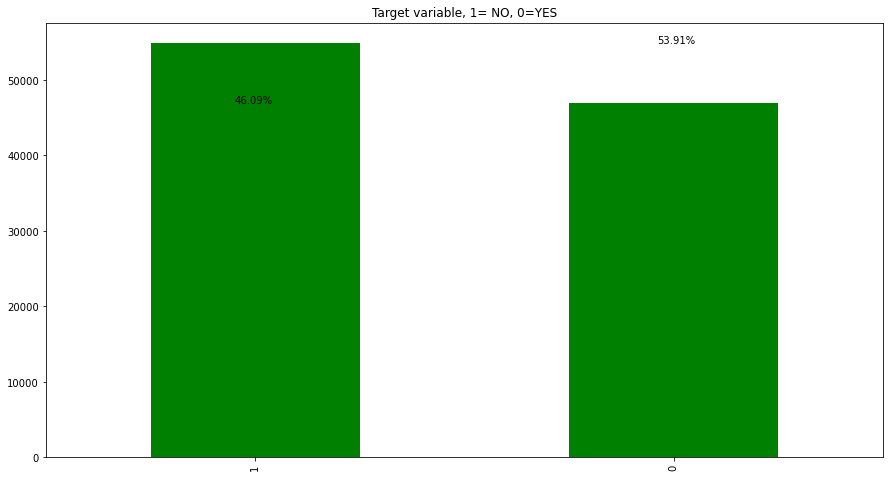

In [113]:
df1['readmitted'].value_counts().plot(kind='bar',color='g')
plt.text(x = -0.05, y = df1['readmitted'].value_counts()[0] + 1, s = str(round((df1['readmitted'].value_counts()[0])*100/len(df1['readmitted']),2)) + '%')
plt.text(x = 0.96, y = df1['readmitted'].value_counts()[1], s = str(round((df1['readmitted'].value_counts()[1])*100/len(df1['readmitted']),2)) + '%') 
plt.title("Target variable, 1= NO, 0=YES")
plt.show()

In [114]:
#model building after feature engineering n target variable

In [115]:
y = df1.readmitted
x = pd.concat([df1_modified[num_col],df_dumm], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify = y)

In [116]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [117]:
y_train_pred = logreg.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.63      0.41      0.50     37521
           1       0.61      0.79      0.69     43891

    accuracy                           0.62     81412
   macro avg       0.62      0.60      0.60     81412
weighted avg       0.62      0.62      0.60     81412



In [118]:
y_test_pred = logreg.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

print("Accuracy=", accuracy_score(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.42      0.50      9381
           1       0.61      0.79      0.69     10973

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.60     20354
weighted avg       0.62      0.62      0.61     20354

Accuracy= 0.6202220693721135


In [119]:
y_pred=performance('Logistic Regression ',logreg, x_train, x_test)
model_perfmnce

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
0,Logistic Regression,-,0.619516,0.620222,0.613646,0.614569,0.794423,0.792673,0.692430,0.692351,0.605589
1,Logistic Regression _OT,0.559,0.614578,0.614474,0.647035,0.646816,0.627281,0.627540,0.637005,0.637032,0.613365


<AxesSubplot:>

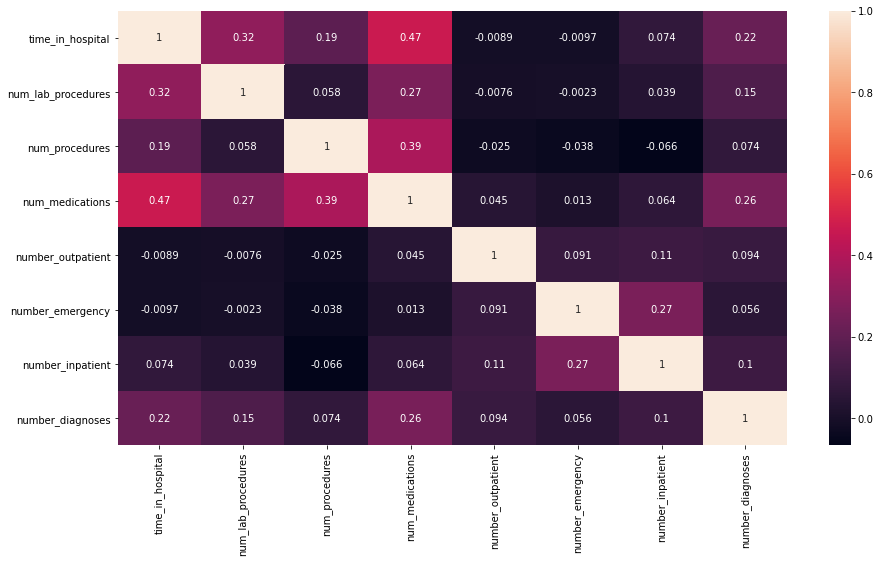

In [120]:
sns.heatmap(x[num_col].corr(),annot=True)

In [121]:
#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["Features"] = x[num_col].columns

vif["VIF"] = [variance_inflation_factor(x[num_col].values, i) for i in range(x[num_col].shape[1])]

print(vif)

             Features       VIF
0    time_in_hospital  4.329577
1  num_lab_procedures  5.930677
2      num_procedures  1.924104
3     num_medications  7.394470
4   number_outpatient  1.114067
5    number_emergency  1.132484
6    number_inpatient  1.385070
7    number_diagnoses  7.516375


No feature has much VIF vlue, so need of any modifications.

In [122]:
#Feature Engineering in categorical variables

In [123]:
cat_col = ['age','race', 'gender','admission_type_id', 
        'discharge_disposition_id', 'admission_source_id',
        'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult',
       'insulin', 'med_down', 'med_up', 'med_steady', 'med_no']

In [124]:
df1_modified['age'].value_counts()  #ordinal encoding

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [125]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


In [126]:
df1_modified['age']=df1_modified['age'].map({'[70-80)':7,'[60-70)':6,'[50-60)':5,'[80-90)':8,'[40-50)':4,'[30-40)':3,'[90-100)':9,'[20-30)':2,'[10-20)':1,'[0-10)':0})


In [127]:
df1_modified['age'].value_counts()  

7    26068
6    22483
5    17256
8    17197
4     9685
3     3775
9     2793
2     1657
1      691
0      161
Name: age, dtype: int64

In [128]:
df1_modified['weight']=df1_modified['weight'].map({'[175-200)':7,'[150-175)':6,'[125-150)':5,'>200':8,'[100-125)':4,'[75-100)':3,'[50-75)':2,'[25-50)':1,'[0-25)':0})


In [129]:
df1_modified['race'].value_counts()   #ordinal encoding

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [130]:
df1_modified['race']=df1_modified['race'].replace({'?':'Other'})

In [131]:
df1_modified['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [132]:
LE=LabelEncoder()
df1_modified['race']=LE.fit_transform(df1_modified['race'])

In [133]:
df1_modified['race'].value_counts()

2    76099
0    19210
4     3779
3     2037
1      641
Name: race, dtype: int64

In [134]:
df1_modified['gender']= df1_modified['gender'].replace({'Unknown/Invalid':'Male'}, value=None)

In [135]:
df1_modified['gender'].value_counts()

Female    54708
Male      47058
Name: gender, dtype: int64

In [136]:
df1_modified['gender']=pd.get_dummies(df1_modified['gender'])

In [137]:
df1_modified['gender'].value_counts()

1    54708
0    47058
Name: gender, dtype: int64

In [138]:
df1_modified= df1_modified.drop("payer_code",axis=1)

In [139]:
df1_modified['medical_specialty'].value_counts()

?                         49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Speech                        1
Perinatology                  1
SportsMedicine                1
Dermatology                   1
Neurophysiology               1
Name: medical_specialty, Length: 73, dtype: int64

In [140]:
df1_modified['medical_specialty']=df1_modified['medical_specialty'].replace({'?':'Other'})

In [141]:
df1_modified['medical_specialty'].value_counts()

Other                     49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Speech                        1
Perinatology                  1
SportsMedicine                1
Dermatology                   1
Neurophysiology               1
Name: medical_specialty, Length: 73, dtype: int64

In [142]:
df1_modified['medical_specialty']

0         Pediatrics-Endocrinology
1                            Other
2                            Other
3                            Other
4                            Other
                    ...           
101761                       Other
101762                       Other
101763                       Other
101764             Surgery-General
101765                       Other
Name: medical_specialty, Length: 101766, dtype: object

In [143]:
df1_modified['medical_specialty']=LE.fit_transform(df1_modified['medical_specialty'])

In [144]:
df1_modified['medical_specialty'].value_counts()

30    49949
18    14635
8      7565
11     7440
3      5352
      ...  
68        1
57        1
58        1
21        1
7         1
Name: medical_specialty, Length: 73, dtype: int64

In [145]:
df1_modified['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [146]:
df1_modified['max_glu_serum']=LE.fit_transform(df1_modified['max_glu_serum'])

In [147]:
df1_modified['max_glu_serum'].value_counts()

2    96420
3     2597
0     1485
1     1264
Name: max_glu_serum, dtype: int64

In [148]:
df1_modified['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [149]:
df1_modified['A1Cresult']=LE.fit_transform(df1_modified['A1Cresult'])

In [150]:
df1_modified['insulin'].value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [151]:
df1_modified['insulin']=LE.fit_transform(df1_modified['insulin'])

In [152]:
df1_modified=df1_modified.drop(['admission_type_id','discharge_disposition_id', 'admission_source_id','encounter_id', 'patient_nbr'],axis=1)

In [153]:
df1_modified=df1_modified.drop(['diag_2', 'diag_3','diag_1'],axis=1)

In [154]:
df1_modified=df1_modified.drop('weight',axis=1)

In [155]:
df1_modified.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin', 'med_down',
       'med_up', 'med_steady', 'med_no'],
      dtype='object')

In [156]:
df1_modified.head(2)

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,med_down,med_up,med_steady,med_no
0,2,1,0,1,38,41,0,1,0,0,0,1,2,2,1,0,0,0,22
1,2,1,1,3,30,59,0,18,0,0,0,9,2,2,3,0,0,0,22


In [157]:
y = df1.readmitted
x = df1_modified

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify = y)

In [158]:
logreg1 = LogisticRegression()
logreg1.fit(x_train,y_train)

LogisticRegression()

In [159]:
y_train_pred1 = logreg1.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.64      0.39      0.48     37521
           1       0.61      0.81      0.70     43891

    accuracy                           0.62     81412
   macro avg       0.62      0.60      0.59     81412
weighted avg       0.62      0.62      0.60     81412



In [160]:
y_test_pred1 = logreg1.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred1))



              precision    recall  f1-score   support

           0       0.64      0.39      0.48      9381
           1       0.61      0.81      0.70     10973

    accuracy                           0.62     20354
   macro avg       0.62      0.60      0.59     20354
weighted avg       0.62      0.62      0.60     20354



In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
dt  = DecisionTreeClassifier()
dt1=dt.fit(x_train,y_train)

In [163]:
y_train_pred_dt = dt1.predict(x_train)
print(classification_report(y_train,y_train_pred_dt)) #fully_grown

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37521
           1       1.00      1.00      1.00     43891

    accuracy                           1.00     81412
   macro avg       1.00      1.00      1.00     81412
weighted avg       1.00      1.00      1.00     81412



In [164]:
y_test_pred_dt = dt1.predict(x_test)
print(classification_report(y_test,y_test_pred_dt))

print("Accuracy=", accuracy_score(y_test,y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      9381
           1       0.58      0.58      0.58     10973

    accuracy                           0.55     20354
   macro avg       0.55      0.55      0.55     20354
weighted avg       0.55      0.55      0.55     20354

Accuracy= 0.5485899577478628


In [165]:
y_pred=performance('Decision tree',dt1, x_train, x_test)
model_perfmnce

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
0,Logistic Regression,-,0.619516,0.620222,0.613646,0.614569,0.794423,0.792673,0.692430,0.692351,0.605589
1,Logistic Regression _OT,0.559,0.614578,0.614474,0.647035,0.646816,0.627281,0.627540,0.637005,0.637032,0.613365
2,Decision tree,-,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
3,Decision tree_OT,1.0,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051


<AxesSubplot:>

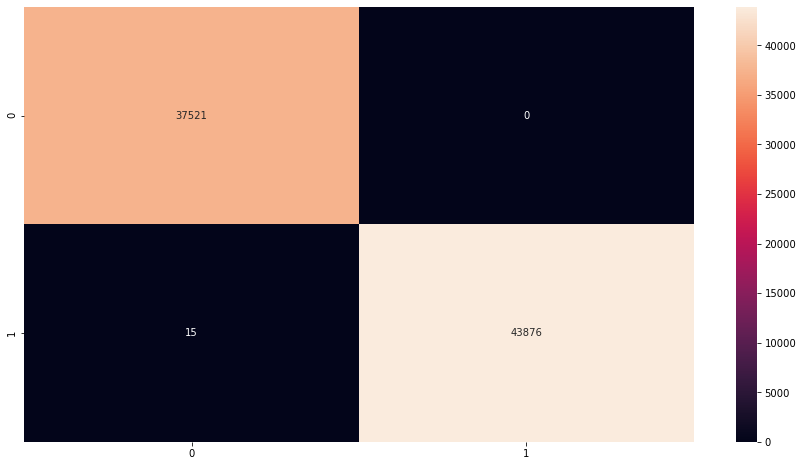

In [166]:
sns.heatmap(confusion_matrix(y_train,y_train_pred_dt), fmt='g',annot=True)

# Bagging

In [167]:
from sklearn.ensemble import BaggingClassifier

In [168]:
bagging_dt = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), 
                  n_estimators=20,
                  max_features=0.7,
                  max_samples= 0.6,
                  bootstrap_features=False
                  )

In [169]:
bagging_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_features=0.7, max_samples=0.6, n_estimators=20)

In [170]:
y_train_pred = bagging_dt.predict(x_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50     37521
           1       0.61      0.78      0.69     43891

    accuracy                           0.62     81412
   macro avg       0.62      0.60      0.60     81412
weighted avg       0.62      0.62      0.60     81412



In [171]:
y_test_pred = bagging_dt.predict(x_test)
print(classification_report(y_test,y_test_pred))

print("Accuracy=", accuracy_score(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51      9381
           1       0.62      0.79      0.69     10973

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.60     20354
weighted avg       0.62      0.62      0.61     20354

Accuracy= 0.6173725066326029


In [172]:
y_pred=performance('Bagging',bagging_dt, x_train, x_test)
model_perfmnce

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
0,Logistic Regression,-,0.619516,0.620222,0.613646,0.614569,0.794423,0.792673,0.692430,0.692351,0.605589
1,Logistic Regression _OT,0.559,0.614578,0.614474,0.647035,0.646816,0.627281,0.627540,0.637005,0.637032,0.613365
2,Decision tree,-,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
3,Decision tree_OT,1.0,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
4,Bagging,-,0.616015,0.620713,0.612659,0.615707,0.782438,0.788754,0.687218,0.691570,0.606455
5,Bagging_OT,0.574,0.544944,0.542743,0.687671,0.682756,0.285685,0.283605,0.403670,0.400747,0.564732


# Random Forest for Classification

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rf = RandomForestClassifier(n_estimators=20,max_depth=2,criterion='entropy',max_samples=0.7,
                            max_features=0.3)  
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, max_features=0.3,
                       max_samples=0.7, n_estimators=20)

In [175]:
y_train_pred_rf = rf.predict(x_train)
print(classification_report(y_train,y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51     37521
           1       0.61      0.77      0.68     43891

    accuracy                           0.61     81412
   macro avg       0.62      0.60      0.60     81412
weighted avg       0.61      0.61      0.60     81412



In [176]:
y_test_pred_rf = rf.predict(x_test)
print(classification_report(y_test,y_test_pred_rf))

print("Accuracy=", accuracy_score(y_test,y_test_pred_rf))


              precision    recall  f1-score   support

           0       0.62      0.43      0.51      9381
           1       0.62      0.78      0.69     10973

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.60     20354
weighted avg       0.62      0.62      0.61     20354

Accuracy= 0.6191412007467819


In [177]:
y_pred=performance('Random Forest',rf, x_train, x_test)
model_perfmnce

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
0,Logistic Regression,-,0.619516,0.620222,0.613646,0.614569,0.794423,0.792673,0.692430,0.692351,0.605589
1,Logistic Regression _OT,0.559,0.614578,0.614474,0.647035,0.646816,0.627281,0.627540,0.637005,0.637032,0.613365
2,Decision tree,-,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
3,Decision tree_OT,1.0,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
4,Bagging,-,0.616015,0.620713,0.612659,0.615707,0.782438,0.788754,0.687218,0.691570,0.606455
5,Bagging_OT,0.574,0.544944,0.542743,0.687671,0.682756,0.285685,0.283605,0.403670,0.400747,0.564732
6,Random Forest,-,0.614307,0.619141,0.612949,0.616492,0.772208,0.776725,0.683423,0.687394,0.605770
7,Random Forest_OT,0.546,0.617820,0.616832,0.635479,0.634355,0.682737,0.682858,0.658261,0.657713,0.611230


# Hyperparameter Tuning

In [178]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

In [179]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': [2,4,6,8,10],
                     'min_samples_split': [2,5,9],
                     'min_samples_leaf': [2,5,8],
                     'max_leaf_nodes': [2,6,8]}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# using GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 2} 



In [180]:
tunned_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_leaf_nodes= 8, min_samples_leaf= 2, min_samples_split= 2)
tunned_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=8,
                       min_samples_leaf=2)

In [181]:
y_pred=performance('Decision Tree after tunning',tunned_dt, x_train, x_test)
model_perfmnce

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
0,Logistic Regression,-,0.619516,0.620222,0.613646,0.614569,0.794423,0.792673,0.692430,0.692351,0.605589
1,Logistic Regression _OT,0.559,0.614578,0.614474,0.647035,0.646816,0.627281,0.627540,0.637005,0.637032,0.613365
2,Decision tree,-,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
3,Decision tree_OT,1.0,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
4,Bagging,-,0.616015,0.620713,0.612659,0.615707,0.782438,0.788754,0.687218,0.691570,0.606455
5,Bagging_OT,0.574,0.544944,0.542743,0.687671,0.682756,0.285685,0.283605,0.403670,0.400747,0.564732
6,Random Forest,-,0.614307,0.619141,0.612949,0.616492,0.772208,0.776725,0.683423,0.687394,0.605770
7,Random Forest_OT,0.546,0.617820,0.616832,0.635479,0.634355,0.682737,0.682858,0.658261,0.657713,0.611230
8,Decision Tree after tunning,-,0.616359,0.620664,0.624156,0.627270,0.724909,0.730338,0.670771,0.674892,0.611358
9,Decision Tree after tunning_OT,0.61,0.525451,0.523632,0.704378,0.697251,0.206398,0.205687,0.319249,0.317664,0.550610


Randm Forest

In [182]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(x_train, y_train)

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 0
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [183]:
rf_model = RandomForestClassifier(criterion ='entropy', 
                                  n_estimators = 20,
                                  max_depth = 15,
                                  max_leaf_nodes = 5,
                                  min_samples_leaf = 1,
                                  min_samples_split =5,
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(x_train, y_train)


In [184]:
y_pred=performance('Random Forest after tunning',rf_model, x_train, x_test)
model_perfmnce

,Model,Threshold,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC
0,Logistic Regression,-,0.619516,0.620222,0.613646,0.614569,0.794423,0.792673,0.692430,0.692351,0.605589
1,Logistic Regression _OT,0.559,0.614578,0.614474,0.647035,0.646816,0.627281,0.627540,0.637005,0.637032,0.613365
2,Decision tree,-,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
3,Decision tree_OT,1.0,0.999816,0.548590,1.000000,0.581798,0.999658,0.578511,0.999829,0.580150,0.546051
4,Bagging,-,0.616015,0.620713,0.612659,0.615707,0.782438,0.788754,0.687218,0.691570,0.606455
5,Bagging_OT,0.574,0.544944,0.542743,0.687671,0.682756,0.285685,0.283605,0.403670,0.400747,0.564732
6,Random Forest,-,0.614307,0.619141,0.612949,0.616492,0.772208,0.776725,0.683423,0.687394,0.605770
7,Random Forest_OT,0.546,0.617820,0.616832,0.635479,0.634355,0.682737,0.682858,0.658261,0.657713,0.611230
8,Decision Tree after tunning,-,0.616359,0.620664,0.624156,0.627270,0.724909,0.730338,0.670771,0.674892,0.611358
9,Decision Tree after tunning_OT,0.61,0.525451,0.523632,0.704378,0.697251,0.206398,0.205687,0.319249,0.317664,0.550610


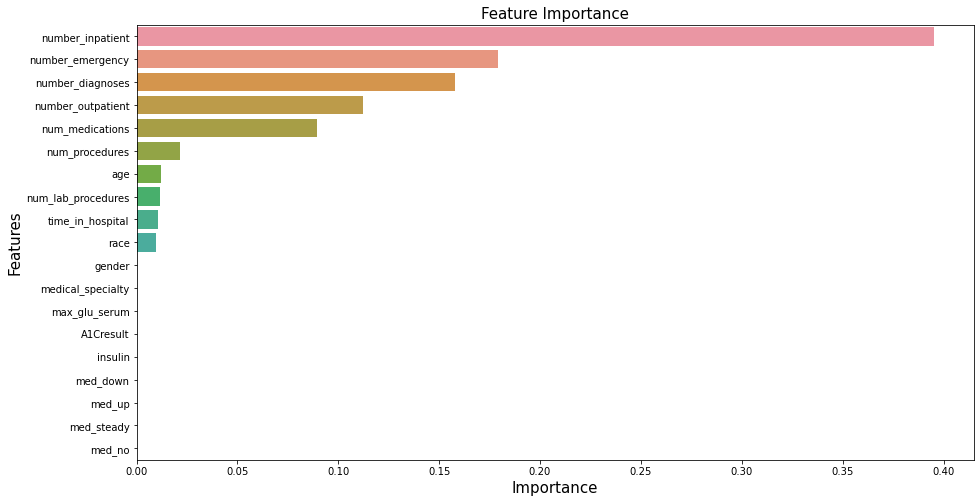

In [185]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

XGBoost

In [186]:
# import the XGBoost function for classification
from xgboost import XGBClassifier

In [187]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[15:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:23:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:24:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:38:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:45:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
xgb_grid_model = XGBClassifier(learning_rate = 0.1,
                               max_depth = 7,
                              gamma =4)

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(x_train, y_train)



In [ ]:
y_pred=performance('XGBoost after tunning',xgb_grid_model, x_train, x_test)
model_perfmnce

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_train_pred_dt),fmt='g',annot=True)

In [ ]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': xgb_grid_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

LightGBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
llgb=lgb.LGBMClassifier()

llgb.fit(x_train,y_train)

In [ ]:
y_pred=performance('LGBM after tunning',llgb, x_train, x_test)
model_perfmnce

In [ ]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': llgb.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()